In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
df = pd.read_csv("winequality-red.csv")

<h3>Linear Regression</h3>

In [23]:
from sklearn.linear_model import LinearRegression as LR
reg = LR()

In [13]:
conditions = [
    (df["quality"]>=7),
    (df["quality"]<=4)
]
rating = ["superb","poor"]
df["rating"] = np.select(conditions,rating,default="fine")

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine


In [20]:
reg.fit(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']],df.quality)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg.coef_

array([ 2.49905527e-02, -1.08359026e+00, -1.82563948e-01,  1.63312698e-02,
       -1.87422516e+00,  4.36133331e-03, -3.26457970e-03, -1.78811638e+01,
       -4.13653144e-01,  9.16334413e-01,  2.76197699e-01])

In [22]:
reg.intercept_

21.96520844944809

<h3>plot of alcohol content vs quality<h3>

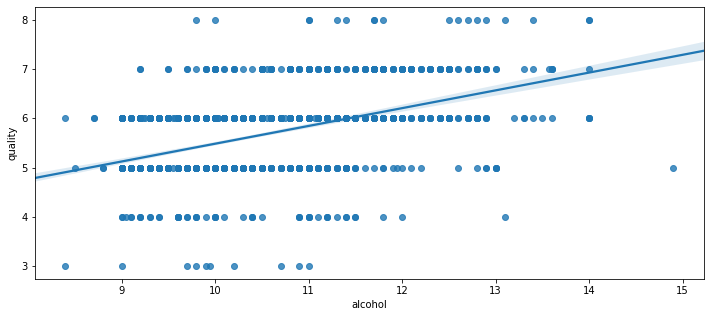

In [52]:
width=12
height=5

plt.figure(figsize=(width,height))
sns.regplot(x="alcohol",y="quality",data=df)